# Traitements statistiques
__Durée : 1h30__

Pandas et Matplotlib, puis aller vers des tests et des modèles

In [2]:
#Charger les librairies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Charger le corpus mis en forme précédemment

In [90]:
corpus = pd.read_excel("../Données/corpus.xlsx")

In [91]:
corpus[0:3]

,Date_reco,Date,Titre,Journal,Contenu,Nombre de mots,freq-homeo,freq-alterna,freq-allopath,freq-nofakemed,Journal-reco
0,2018-05-23,"Science & Médecine, mercredi 23 mai 2018 246...",Homéopathie Une réglementation à haute diluti...,Le Monde,(Lyon; correspondant); - Quand on lui parle ...,2679,43,2,2,0,Le Monde
1,2018-06-16,"Événement, samedi 16 juin 2018 1243 mots, p. 4",Principale «Réduire l'homéopathie à un effet ...,"Libération, no. 11524","Le regard, au-dessus des petites lunettes ce...",1341,26,0,12,0,Libération
2,2018-04-10,"Sciences et éthique, mardi 10 avril 2018 105...",Faut-il en finir avec l'homéopathie? Une trib...,"La Croix, no. 41073",Faut-il se débarrasser de l'homéopathie? Voi...,1183,23,0,0,0,La Croix


Possibiliter de traiter chaque colonne

In [24]:
corpus["Nombre de mots"].median()

495.5

Résumer l'information

In [23]:
corpus[corpus.columns[-5:]].describe()

,Nombre de mots,freq-homeo,freq-alterna,freq-allopath,freq-nofakemed
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,686.580000,7.580000,0.520000,0.340000,0.360000
std,681.502335,7.961873,0.886175,1.733346,1.625812
min,23.000000,1.000000,0.000000,0.000000,0.000000
25%,195.000000,2.000000,0.000000,0.000000,0.000000
50%,495.500000,4.500000,0.000000,0.000000,0.000000
75%,897.750000,11.000000,1.000000,0.000000,0.000000
max,3089.000000,43.000000,3.000000,12.000000,11.000000


Sauvegarder le résumé

In [26]:
corpus[corpus.columns[-5:]].agg(["mean","median","std"]).T.to_excel("stats.xlsx")

,mean,median,std
Nombre de mots,686.58,495.5,681.502335
freq-homeo,7.58,4.5,7.961873
freq-alterna,0.52,0.0,0.886175
freq-allopath,0.34,0.0,1.733346
freq-nofakemed,0.36,0.0,1.625812


## Visualiser
* Différentes visualisations
* Mettre un titre, légende ,couleur, taille
* Sauvegarder
* Plusieurs graphiques fig, ax_lst = plt.subplots(2, 2)

D'abord de l'exploratoire

Text(0, 0.5, "Nombre d'articles")

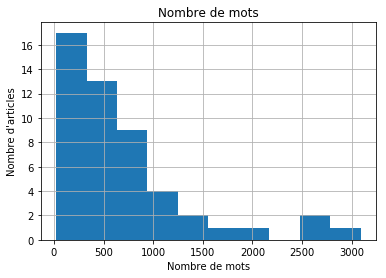

In [79]:
corpus["Nombre de mots"].hist()
plt.title("Nombre de mots")
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre d'articles")
#plt.grid(False)
#plt.savefig()


On peut changer la couleur, le découpage, etc

Voir l'évolution temporelle d'un des termes : fakemed

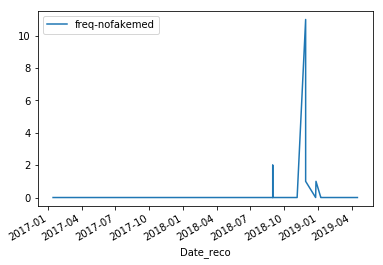

In [87]:
corpus[["Date_reco","freq-nofakemed"]].set_index("Date_reco").plot()

Text(0, 0.5, "Nombre d'occurence de homéopathie")

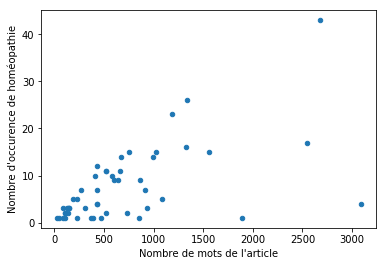

In [19]:
corpus.plot(kind="scatter", x="Nombre de mots",y="freq-homeo")
plt.xlabel("Nombre de mots de l'article")
plt.ylabel("Nombre d'occurence de homéopathie")

En dernier recours, toutes les visualisations sont possibles...

Se poser la question des régularités observés : par exemple, est-ce qu'il y a une corrélation ?

In [28]:
corpus[corpus.columns[-5:]].corr()

,Nombre de mots,freq-homeo,freq-alterna,freq-allopath,freq-nofakemed
Nombre de mots,1.000000,0.584875,0.454909,0.209720,0.456046
freq-homeo,0.584875,1.000000,0.268768,0.437926,0.166425
freq-alterna,0.454909,0.268768,1.000000,-0.037733,0.434013
freq-allopath,0.209720,0.437926,-0.037733,1.000000,-0.044320
freq-nofakemed,0.456046,0.166425,0.434013,-0.044320,1.000000


In [33]:
ss_corpus = corpus[corpus.columns[-4:]]

In [37]:
def reco(x):
    if x==0:
        return 0
    return 1
ss_corpus = ss_corpus.applymap(reco)

In [38]:
pd.crosstab(ss_corpus["freq-allopath"],ss_corpus["freq-nofakemed"])

freq-nofakemed,0,1
freq-allopath,,
0,41,5
1,4,0


Faire un test de khi2 sur le tableau

In [39]:
from scipy.stats import chi2_contingency

In [110]:
p = chi2_contingency(pd.crosstab(ss_corpus["freq-allopath"],ss_corpus["freq-nofakemed"]))
p[1]

0.8620525004159771

Faire une ANOVA, par exemple pour se demander si la taille des articles varie entre les journaux

Pour plus d'info : https://pythonfordatascience.org/anova-python/

In [103]:
corpus.groupby("Journal-reco")["Nombre de mots"].describe()

,count,mean,std,min,25%,50%,75%,max
Journal-reco,,,,,,,,
La Croix,15.0,375.933333,298.828060,23.0,148.50,368.0,479.50,1183.0
Le Monde,25.0,819.640000,839.802253,43.0,152.00,600.0,937.00,3089.0
Libération,10.0,819.900000,528.450239,145.0,454.75,793.5,1015.25,1888.0


In [104]:
from scipy.stats import f_oneway

In [106]:
f_oneway(corpus[corpus["Journal-reco"]=="Le Monde"]["Nombre de mots"],
        corpus[corpus["Journal-reco"]=="La Croix"]["Nombre de mots"],
        corpus[corpus["Journal-reco"]=="Libération"]["Nombre de mots"])

F_onewayResult(statistic=2.348742226503404, pvalue=0.10660277164869987)

Il existe plusieurs façon de faire les tests, et de les paramétrer. Par exemple, une nouvelle librairie : 
https://researchpy.readthedocs.io

## Aller vers des modèles
* Régression linéaire (polyfit, poly1d)

Text(0, 0.5, "Nombre d'occurence de homéopathie")

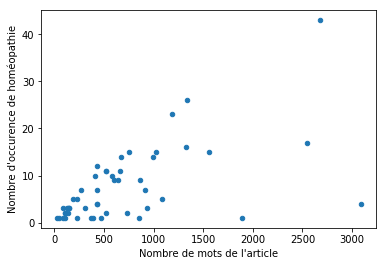

In [41]:
ax = corpus.plot(kind="scatter", x="Nombre de mots",y="freq-homeo")
plt.xlabel("Nombre de mots de l'article")
plt.ylabel("Nombre d'occurence de homéopathie")

Librairie de modèles

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize

Initier un modèle

In [53]:
model = LinearRegression()

Mettre en forme les données

In [107]:
X = np.array(corpus["Nombre de mots"]).reshape((-1, 1))
Y = np.array(corpus["freq-homeo"]).reshape((-1, 1))

Adapter le modèle aux données

In [ ]:
model.fit(X,Y)

Résultat du modèle

In [74]:
model.coef_

array([[0.006833]])

Représenter la droite de régression prédite

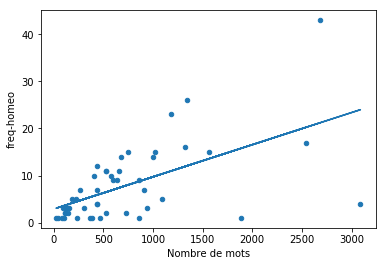

In [108]:
ax = corpus.plot(kind="scatter", x="Nombre de mots",y="freq-homeo")

Y_pred = model.predict(X)
ax.plot(X,Y_pred)

Des régressions de polynomes

(0, 40)

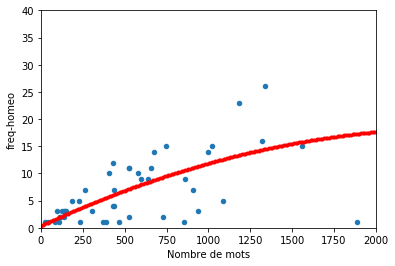

In [77]:
import numpy as np
param_droite = np.polyfit(corpus["Nombre de mots"],corpus["freq-homeo"],deg=2)
def parabole(x,a,b,c):
    y = a*x**2+b*x+c
    return y

ax = corpus.plot(kind="scatter", x="Nombre de mots",y="freq-homeo")
X = np.linspace(0,10000,1000)
ax.plot(X,parabole(X,param_droite[0],param_droite[1],param_droite[2]),".",color="red")
plt.xlim(0,2000)
plt.ylim(0,40)

## Aller plus loin : les autres formes de régressions